# TPL2 - Grupo 1

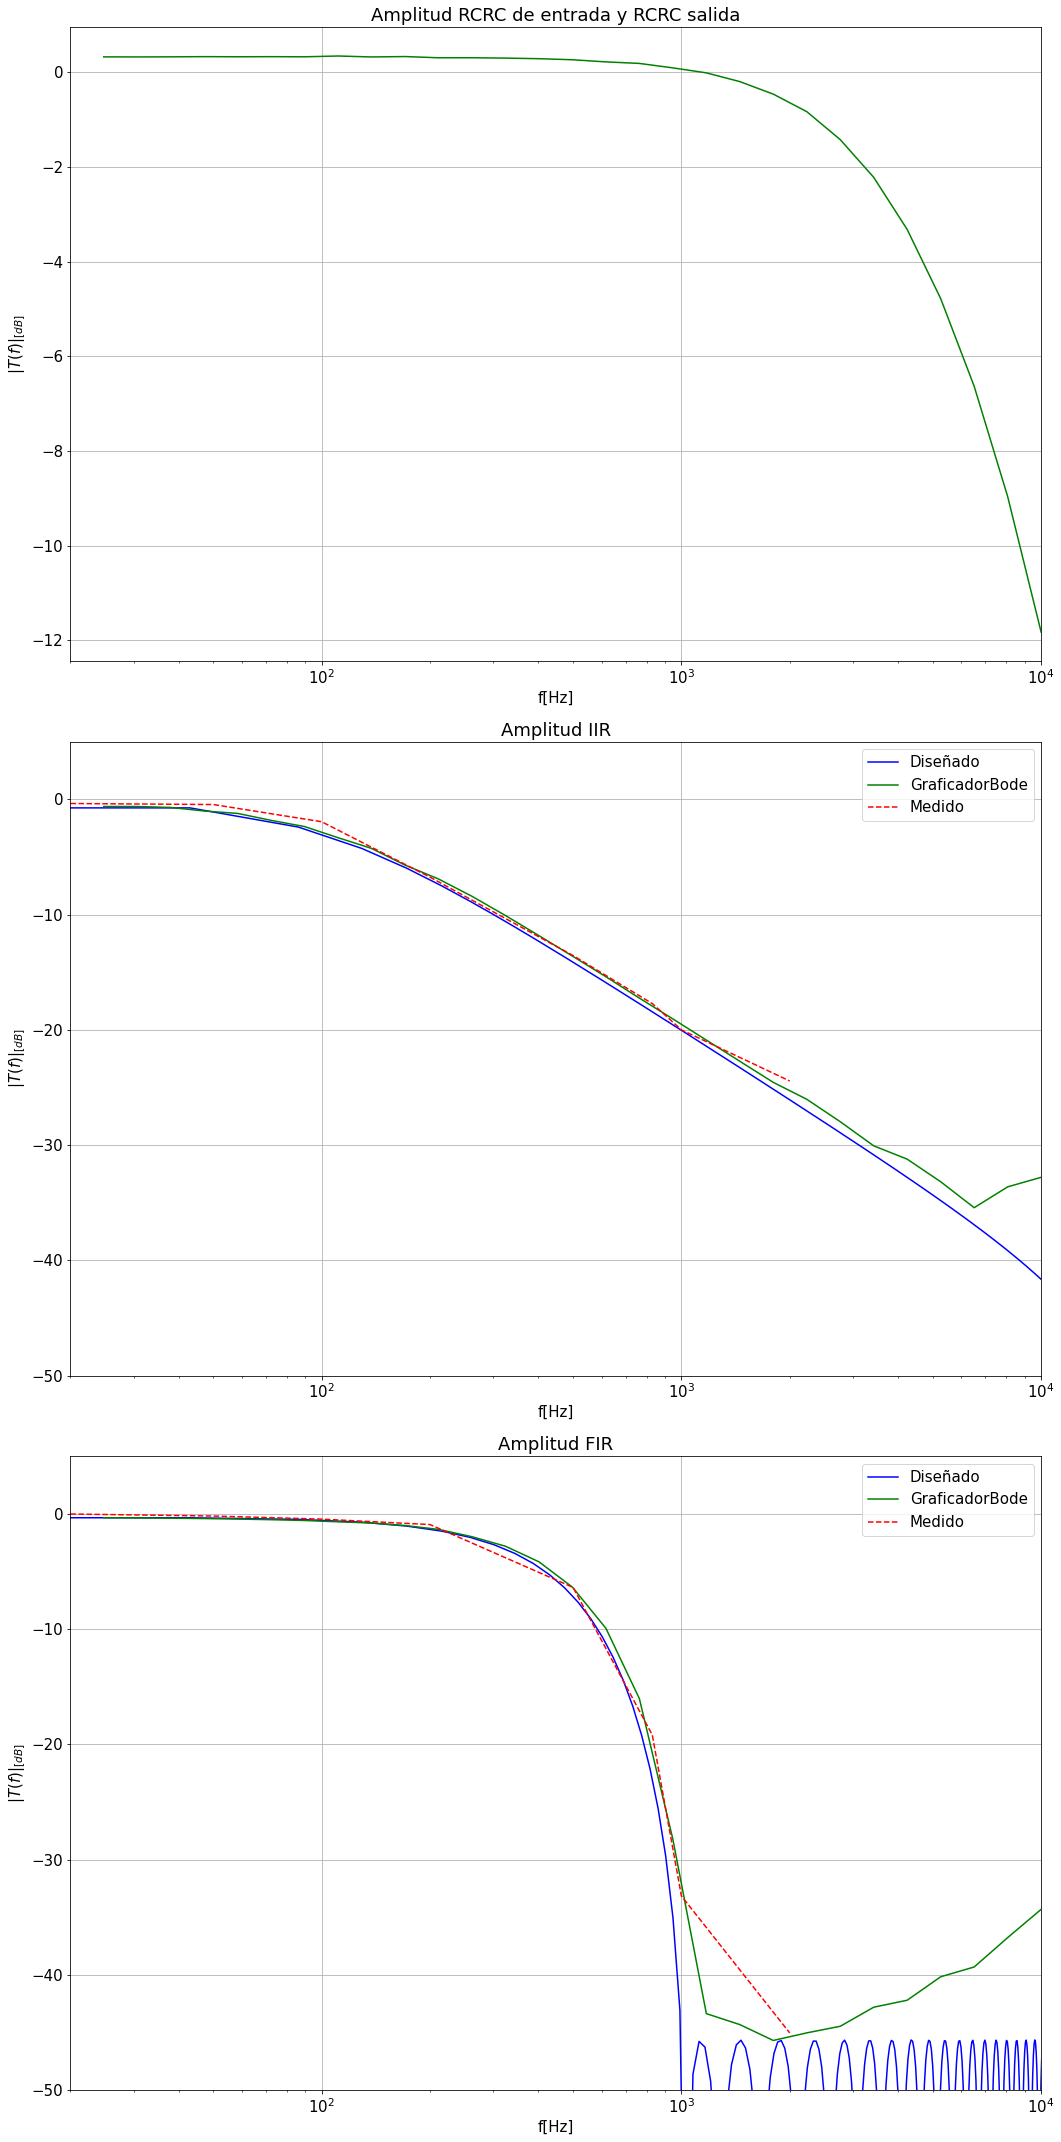

In [56]:
from numpy import genfromtxt
import numpy as np
import ltspice
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy import signal as sig

####################### Mediciones Labo #######################
frec = np.array([10, 20, 50, 100, 200, 500, 830, 1000, 2000])
amplitud_fir = ([1, 1, 0.98, 0.95, 0.9, 0.48, 0.11, 0.022, 0.0056])
amplitud_iir = ([0.97, 0.96, 0.95, 0.8, 0.46, 0.21, 0.13, 0.1, 0.06])

####################### Filtros diseñados #######################
fs = 44.1e3

num_iir = np.array([0.007090218822253807,0.007090218822253807])
den_iir = np.array([1,-0.9858195623554924])

coef_fir = np.array([0.003221104751733098,0.0013529433299383775,0.0016275818791218763,0.0019311414211045084,0.0022640645437228026,0.0026257204473965883,0.0030170717884689165,0.003439045325396573,0.0038931617714463708,0.004376549205862919,0.0048857412274315734,0.005421337313790469,0.005989685494446353,0.006574471459980478,0.007186406886504233,0.00781744135481378,0.00846749551778523,0.009133662403753035,0.009812350804889033,0.010500588738973311,0.011195998831749397,0.011894892380475554,0.012592436658145576,0.013285897407682126,0.013973238175523168,0.014647576481258924,0.015308169370184074,0.015949133765040327,0.016567819182665904,0.0171604089550711,0.017722762037394035,0.018251351308499385,0.018743414720751982,0.01919592165053755,0.01960519688129726,0.019969539693979778,0.02028669363991169,0.020553921878667135,0.020770522965881943,0.02093383340438279,0.02104352964333179,0.021098781040298373,0.021098781040298373,0.02104352964333179,0.02093383340438279,0.020770522965881943,0.020553921878667135,0.02028669363991169,0.019969539693979778,0.01960519688129726,0.01919592165053755,0.018743414720751982,0.018251351308499385,0.017722762037394035,0.0171604089550711,0.016567819182665904,0.015949133765040327,0.015308169370184074,0.014647576481258924,0.013973238175523168,0.013285897407682126,0.012592436658145576,0.011894892380475554,0.011195998831749397,0.010500588738973311,0.009812350804889033,0.009133662403753035,0.00846749551778523,0.00781744135481378,0.007186406886504233,0.006574471459980478,0.005989685494446353,0.005421337313790469,0.0048857412274315734,0.004376549205862919,0.0038931617714463708,0.003439045325396573,0.0030170717884689165,0.0026257204473965883,0.0022640645437228026,0.0019311414211045084,0.0016275818791218763,0.0013529433299383775,0.003221104751733098]) 

# Obtengo H(z) 
f_z_iir , h_z_iir = sig.freqz(num_iir, den_iir, fs = fs)
f_z_fir , h_z_fir = sig.freqz(coef_fir, 1, fs = fs)

# Ajusto tamaño de graficos
mpl.rcParams['figure.figsize'] = (15,30)
mpl.rcParams['font.size'] = 15

####################### Graficador de BODE #######################
amplitud_CSV0 = genfromtxt('Sweep Data_0.csv', delimiter=',')
amplitud_RCRC = genfromtxt('Sweep Data_1.csv', delimiter=',')
amplitud_CSV2 = genfromtxt('Sweep Data_2.csv', delimiter=',')

f_amp_iir = amplitud_CSV0[1:30,0]
amp_iir = amplitud_CSV0[1:30,1]

f_amp_RCRC = amplitud_RCRC[1:30,0]
amp_RCRC = amplitud_RCRC[1:30,1]

f_amp_fir = amplitud_CSV2[1:30,0]
amp_fir = amplitud_CSV2[1:30,1]


####################### Ploteo #######################
fig,ax = plt.subplots(3,1)

ax[0].plot(f_amp_RCRC, amp_RCRC, 'g')
ax[0].set_xlabel('f[Hz]')
ax[0].set_ylabel(r'$|T(f)|_{[dB]}$')
ax[0].set_xscale('log')
ax[0].set_xlim([20,10000])
ax[0].grid()
ax[0].set_title("Amplitud RCRC de entrada y RCRC salida")

ax[1].plot(f_z_iir, 20 * np.log10(abs(h_z_iir)), 'b' ,f_amp_iir, amp_iir-amp_RCRC, 'g', frec ,20*np.log10(amplitud_iir) , '--r')
ax[1].set_xlabel('f[Hz]')
ax[1].set_ylabel(r'$|T(f)|_{[dB]}$')
ax[1].set_xscale('log')
ax[1].set_ylim([-50,5])
ax[1].set_xlim([20,10000])
ax[1].grid()
ax[1].set_title("Amplitud IIR")
ax[1].legend(['Diseñado', 'GraficadorBode' , 'Medido'])

ax[2].plot(f_z_fir, 20 * np.log10(abs(h_z_fir)), 'b' ,f_amp_fir, amp_fir-amp_RCRC, 'g', frec ,20*np.log10(amplitud_fir) , '--r')
ax[2].set_xlabel('f[Hz]')
ax[2].set_ylabel(r'$|T(f)|_{[dB]}$')
ax[2].set_xscale('log')
ax[2].set_ylim([-50,5])
ax[2].set_xlim([20,10000])
ax[2].grid()
ax[2].set_title("Amplitud FIR")
ax[2].legend(['Diseñado', 'GraficadorBode', 'Medido'])

fig.tight_layout()